In [2]:
## imports
import math
import numpy as np
import pandas as pd
import numpy.matlib

from scipy.io import loadmat, savemat
from scipy import interpolate
from scipy.stats import norm, multivariate_normal, multivariate_t, t
from scipy.special import expit
from scipy.optimize import minimize

from sklearn.model_selection import train_test_split

import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

import time
import os
import yfinance as yf
import importlib

from functools import partial
from statsmodels.graphics.gofplots import qqplot
from statsmodels import distributions
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = [6, 4]


In [3]:
from my_classes.NeuralCopula import *
from my_classes.AnalyticalCopulas import *
from my_classes.Utilities import * 

# Big test of copula performance

In [4]:
np.random.seed(0)
## Initiate datasets 
copulaSpecDict = {'Gaussian_0': {'Copula': GaussianCopula(), 'correlation': 0.0},
       'Gaussian_0.7': {'Copula': GaussianCopula(), 'correlation': 0.7},
       'Students_-0.8_3': {'Copula': StudentsCopula(), 'correlation': -0.8, 'df': 3},
       'Clayton_4': {'Copula': ClaytonCopula(), 'theta': 4},
       }

## Initiate datasets to be used for the copula fitting
copulaList = [GaussianCopula(), StudentsCopula(), ClaytonCopula()]##  NeuralCopula()]#

CodeRun = CodeRunner(copulaSpecDict, copulaList, n = 10000, proportion = 0.5)
CodeRun.createPortfolios()
#CodeRun.fitCopulas()
#CodeRun.displayResults()


# Portfolio Plots

In [ ]:
class PortfolioData():
    def __init__(self, dataDF, Name, proportion = 0.5):
        self.DataGenerator = stockPriceGenerator()
        self.Name = Name
        self.PriceDF = dataDF
        self.FittingDF , self.TestingDF = self.DataGenerator.SplitTimeseriesDF(dataDF, proportion=proportion)
        self.FittingArray, self.TestingArray = self.FittingDF.iloc[:,0:-1].to_numpy(), self.TestingDF.iloc[:,0:-1].to_numpy()
        self.FittingReturns = self.DataGenerator.CalculateLogReturns(self.FittingArray)
        self.TestingReturns = self.DataGenerator.CalculateLogReturns(self.TestingArray)

        self.estimatedStd = np.std(self.FittingReturns, axis=0)
        self.FittingNormalizedReturns = self.FittingReturns / self.estimatedStd
        
        self.FittingSampleDict = {}
        pass


Portfolio: Gaussian_0


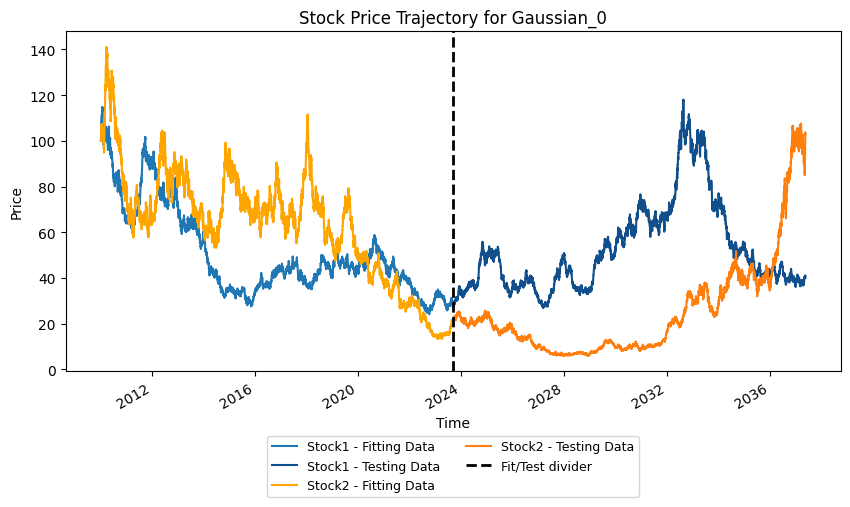

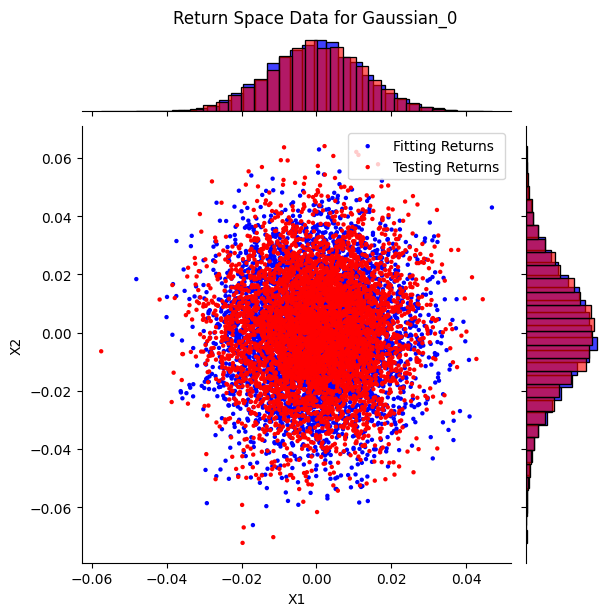

Portfolio: Gaussian_0.7


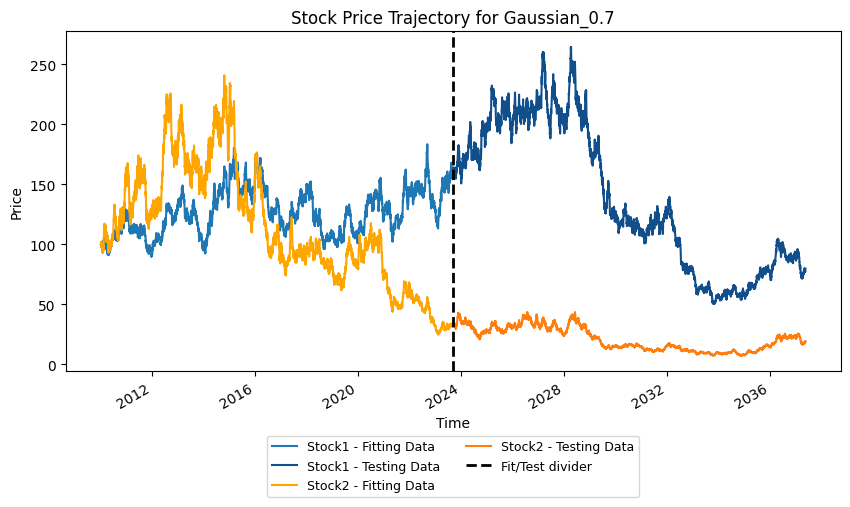

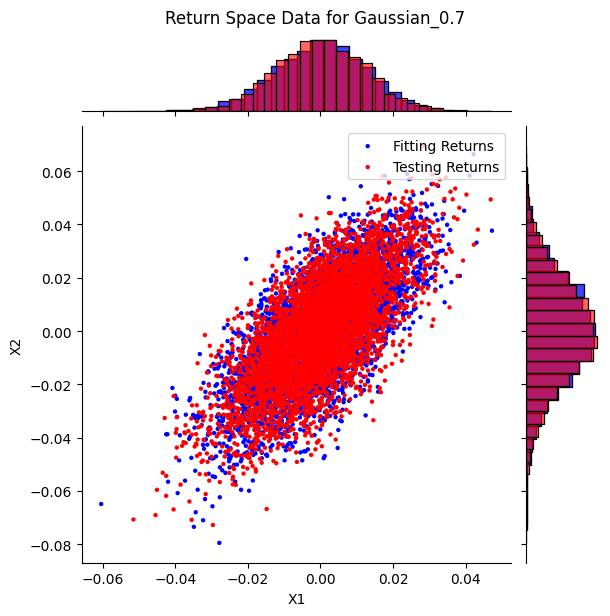

Portfolio: Students_-0.8_3


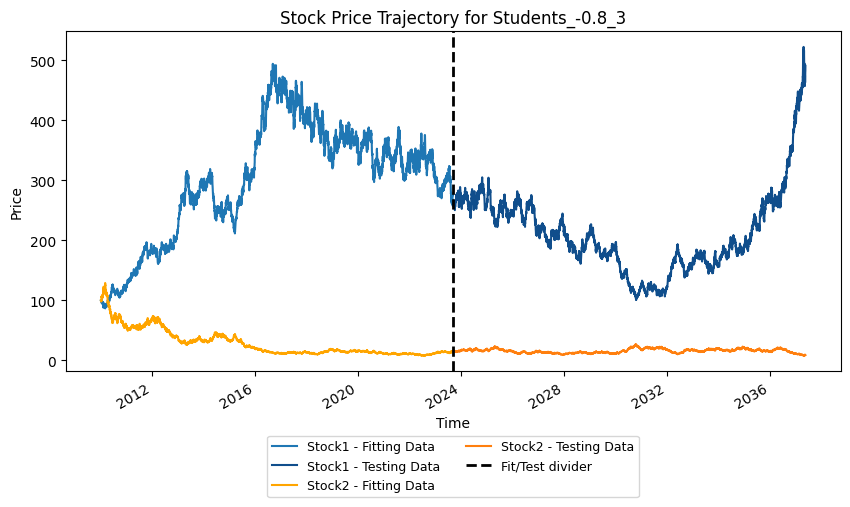

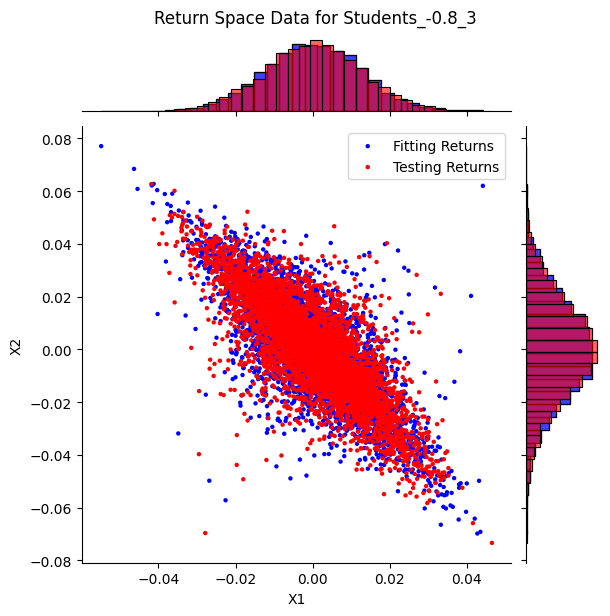

Portfolio: Clayton_4


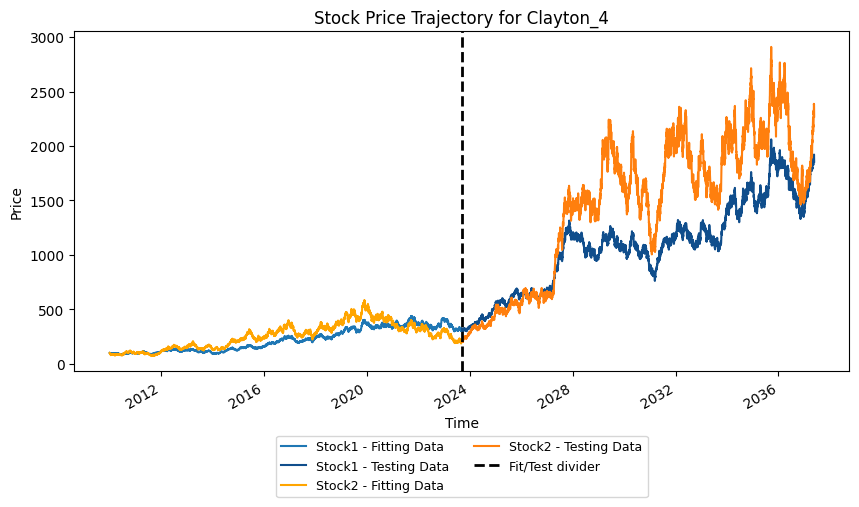

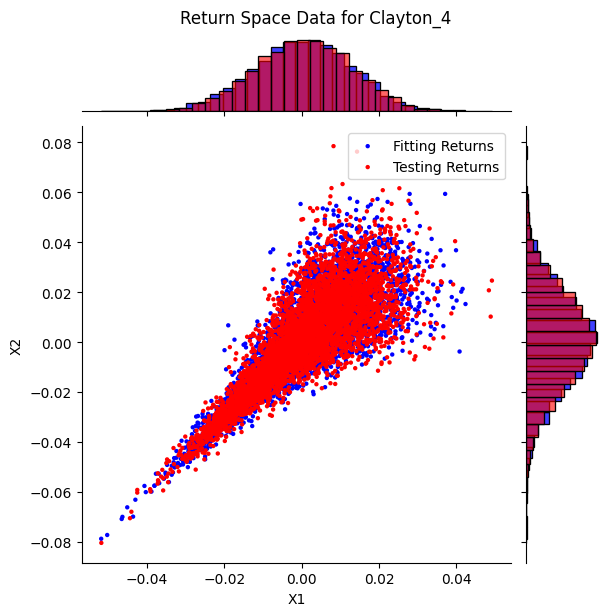

In [13]:
CopulaPlot = plotCopulaData()
portfolioKeys = list(CodeRun.Portfolios.keys())

for key in portfolioKeys:
    print('Portfolio:', key)
    Portfolio = CodeRun.Portfolios[key]
    CopulaPlot.plotStockPriceSections(Portfolio.FittingDF, Portfolio.TestingDF, key = key)
    CopulaPlot.plotFittingTestComparison(Portfolio.FittingReturns, Portfolio.TestingReturns, title=key)
    

